<a href="https://colab.research.google.com/github/wel51x/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/LS_DS2_232_Survival_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Survival Analysis
![My normal approach is useless here, too.](https://imgs.xkcd.com/comics/probability.png)

https://xkcd.com/881/

The aim of survival analysis is to analyze the effect of different risk factors and use them to predict the duration of time between one event ("birth") and another ("death").

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # Unlimited columns


### You can use any Pandas DataFrame with lifelines. 
### The only requirement is that the DataFrame includes features that describe:
* a duration of time for the observation
* a binary column regarding censorship (`1` if the death event was observed, `0` if the death event was not observed)

Sometimes, you will have to engineer these features. How might you go about that? What information would you need?

## Kaplan-Meier survival estimate
 
The Kaplan-Meier method estimates survival probability from observed survival times. It results in a step function that changes value only at the time of each event, and confidence intervals can be computed for the survival probabilities. 

The KM survival curve,a plot of KM survival probability against time, provides a useful summary of the data.
It can be used to estimate measures such as median survival time.

It CANNOT account for risk factors and is NOT regression. It is *non-parametric* (does not involve parameters).

However it is a good way to visualize a survival dataset, and can be useful to compare the effects of a single categorical variable.

In [3]:
!pip install -U matplotlib  # Colab has matplotlib 2.2.3, we need >3

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.0.2)


## Cox Proportional Hazards Model -- Survival Regression
It assumes the ratio of death event risks (hazard) of two groups remains about the same over time.
This ratio is called the hazards ratio or the relative risk.

All Cox regression requires is an assumption that ratio of hazards is constant over time across groups.
The good news—we don’t need to know anything about overall shape of risk/hazard over time
The bad news—the proportionality assumption can be restrictive

## Interpreting the Results
`coef`: usually denoted with $b$, the coefficient

`exp(coef)`: $e^{b}$, equals the estimate of the hazard ratio. Here, we can say that participants who received treatment 1 had ~4.5 times the hazard risk (risk of death) compared to those who received treatment 2. And for every unit the `logWBC` increased, the hazard risk increased >5 times.

`se(coef)`: standard error of the coefficient (used for calculating z-score and therefore p-value)

`z`: z-score $\frac{b}{se(b)}$

`p`: p-value. derived from z-score. describes statistical significance. more specifically, it is the likelihood that the variable has no effect on the outcome

`log(p)`: natural logarithm of p-value... used to more easily see differences in significance

`lower/upper 0.95`: confidence levels for the coefficients. in this case, we can confidently say that the coefficient for `logWBC` is somewhere _between_ 1.02 and 2.34.

`Signif. codes`: easily, visually identify significant variables! The more stars, the more solid (simply based on p-value). Here `logWBC` is highly significant, `Rx` is significant, and `sex` has no statistical significance

`Concordance`: a measure of predictive power for classification problems (here looking at the `status` column. a value from 0 to 1 where values above 0.6 are considered good fits (the higher the better)

`Likelihood ratio (LR) test`: this is a measure of how likely it is that the coefficients are not zero, and can compare the goodness of fit of a model versus an alternative null model. Is often actually calculated as a logarithm, resulting in the log-likelihood ratio statistic and allowing the distribution of the test statistic to be approximated with [Wilks' theorem](https://en.wikipedia.org/wiki/Wilks%27_theorem).

### Remember how the Cox model assumes the ratio of death events between groups remains constant over time?
Well we can check for that.

## The Intuition - Hazard and Survival Functions

### Hazard Function - the dangerous bathtub

The hazard function represents the *instantaneous* likelihood of failure. It can be treated as a PDF (probability density function), and with real-world data comes in three typical shapes.

![Different hazard functions](https://upload.wikimedia.org/wikipedia/commons/2/25/Compsyseng17_04.jpg)

Increasing and decreasing failure rate are fairly intuitive - the "bathtub" shaped is perhaps the most surprising, but actually models many real-world situations. In fact, life expectancy in general, and most threats to it, assume this shape.

What the "bathtub" means is that - threats are highest at youth (e.g. infant mortality), but then decrease and stabilize at maturity, only to eventually re-emerge in old age. Many diseases primarily threaten children and elderly, and middle aged people are also more robust to physical trauma.

The "bathtub" is also suitable for many non-human situations - often with reliability analysis, mechanical parts either fail early (due to manufacturing defects), or they survive and have a relatively long lifetime to eventually fail out of age and use.

### Survival Function (aka reliability function) - it's just a (backwards) CDF

Since the hazard function can be treated as a probability density function, it makes sense to think about the corresponding cumulative distribution function (CDF). But because we're modeling time to failure, it's actually more interesting to look at the CDF backwards - this is called the complementary cumulative distribution function.

In survival analysis there's a special name for it - the survival function - and it gives the probability that the object being studied will survive beyond a given time.

![4 survival functions](https://upload.wikimedia.org/wikipedia/commons/e/e0/Four_survival_functions.svg)

As you can see they all start at 1 for time 0 - at the beginning, all things are alive. Then they all move down over time to eventually approach and converge to 0. The different shapes reflect the average/expected retention of a population subject to this function over time, and as such this is a particularly useful visualization when modeling overall retention/churn situations.

### Ways to estimate/model survival analysis - terms to be aware of
Key Components Necessary for these models - duration, and whether observation is censored.

- Kaplan Meier Estimator
- Nelson-Aalen Estimator
- Proportional Hazards (Cox Model, integrates covariates)
- Additive Hazards Model (Aalen's Additive Model, when covariates are time-dependent)

As with most statistics, these are all refinements of the general principles, with the math to back them up. Software packages will tend to select reasonable defaults, and allow you to use parameters to tune or select things. The math for these gets varied and deep - but feel free to [dive in](https://en.wikipedia.org/wiki/Survival_analysis) if you're curious!

## Live! Let's try modeling heart attack survival

https://archive.ics.uci.edu/ml/datasets/echocardiogram

# Assignment - Customer Churn

Treselle Systems, a data consulting service, [analyzed customer churn data using logistic regression](http://www.treselle.com/blog/customer-churn-logistic-regression-with-r/). For simply modeling whether or not a customer left this can work, but if we want to model the actual tenure of a customer, survival analysis is more appropriate.

The "tenure" feature represents the duration that a given customer has been with them, and "churn" represents whether or not that customer left (i.e. the "event", from a survival analysis perspective). So, any situation where churn is "no" means that a customer is still active, and so from a survival analysis perspective the observation is censored (we have their tenure up to now, but we don't know their *true* duration until event).

Your assignment is to [use their data](https://github.com/treselle-systems/customer_churn_analysis) to fit a survival model, and answer the following questions:

- What features best model customer churn?
- What would you characterize as the "warning signs" that a customer may discontinue service?
- What actions would you recommend to this business to try to improve their customer retention?

Please create at least *3* plots or visualizations to support your findings, and in general write your summary/results targeting an "interested layperson" (e.g. your hypothetical business manager) as your audience.

This means that, as is often the case in data science, there isn't a single objective right answer - your goal is to *support* your answer, whatever it is, with data and reasoning.

Good luck!

In [99]:
# Loading the data to get you started
churn_data = pd.read_csv(
    'https://raw.githubusercontent.com/treselle-systems/'
    'customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.sample(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1786,7530-HDYDS,Female,0,No,No,38,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),84.25,3264.5,Yes
4113,3982-JGSFD,Male,0,No,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.35,695.85,No
6219,1496-GGSUK,Female,1,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.70,25.7,Yes
507,7218-HKQFK,Male,0,Yes,No,2,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,167.5,Yes
5708,7072-MBHEV,Female,1,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),78.10,864.85,No
1939,8267-KFGYD,Male,0,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,21.05,21.05,No
1305,4945-RVMTE,Female,0,No,No,28,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),59.55,1646.45,No
3128,2739-CCZMB,Male,0,No,Yes,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.35,122,No


In [100]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [101]:
churn_data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,4458-KVRBJ,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [0]:
# make Total Charges numeric
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data = churn_data.dropna(subset=['TotalCharges'])

In [0]:
# additional cleaning
churn_data[churn_data.columns] = churn_data[churn_data.columns].replace(('No internet service'), ('No'))
churn_data[churn_data.columns] = churn_data[churn_data.columns].replace(('No phone service'), ('No'))
churn_data['InternetService'] = churn_data['InternetService'].replace(('Fiber optic'), ('Yes'))
churn_data['InternetService'] = churn_data['InternetService'].replace(('DSL'), ('Yes'))
churn_data[churn_data.columns] = churn_data[churn_data.columns].replace(('Yes', 'No'), (1, 0))
#No internet service .map({'yes': 1, 'no': 0}) InternetService

In [104]:
churn_data.info()  # A lot of these are "object" - some may need to be fixed...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
MultipleLines       7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null object
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int64
dtypes: float64(2), int64(15), object(4)
memo

In [0]:
# drop CustId, sex because I'm not sexist
del churn_data['customerID']
del churn_data['gender']

In [0]:
# encode Contract, PaymentMethod
from sklearn.preprocessing import LabelEncoder
churn_data["Contract"] = LabelEncoder().fit_transform(churn_data["Contract"])
churn_data["PaymentMethod"] = LabelEncoder().fit_transform(churn_data["PaymentMethod"])


In [107]:
#churn_data.PaymentMethod.value_counts()
churn_data.sample(8)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3370,0,1,1,53,0,0,1,1,1,1,0,0,1,0,1,0,48.70,2495.20,0
3342,0,0,0,40,0,0,1,1,1,1,0,1,1,1,0,1,62.05,2511.55,0
1518,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,1,20.55,96.10,0
3542,0,1,1,29,0,0,1,1,1,1,1,0,1,1,1,1,55.35,1636.95,0
1675,0,0,0,29,1,0,1,0,0,0,0,1,0,0,1,2,78.90,2384.15,1
6548,0,1,1,31,1,0,1,0,0,1,1,0,0,0,0,3,54.35,1647.00,0
6084,0,1,0,36,1,1,1,0,0,0,0,1,1,0,1,0,95.00,3440.25,0
6223,0,1,1,7,1,0,1,0,0,0,0,0,0,0,1,2,69.00,506.90,1


In [108]:
churn_data.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,0.182519,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000286,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,-0.138383,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.037529,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.171817,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.210794,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.171240,0.490912,0.469042,0.040033
InternetService,0.182519,0.000286,-0.138383,0.037529,-0.171817,0.210794,1.000000,0.332799,0.380990,0.380151,0.335695,0.414951,0.418450,-0.241574,0.320592,-0.125799,0.763191,0.374878,0.227578
OnlineSecurity,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,0.332799,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,-0.149112,0.296447,0.412619,-0.171270
OnlineBackup,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.380990,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.170720,0.441529,0.510100,-0.082307
DeviceProtection,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.380151,0.274875,0.303058,1.000000,0.332850,0.389924,0.402309,0.219648,0.104079,-0.180931,0.482607,0.522881,-0.066193


### Initial thought is churn vs tenure

/usr/local/lib/python3.6/dist-packages/lifelines/plotting.py:214: UserWarning: For less visual clutter, you may want to subsample to less than 80 individuals.
  warnings.warn("For less visual clutter, you may want to subsample to less than 80 individuals.")


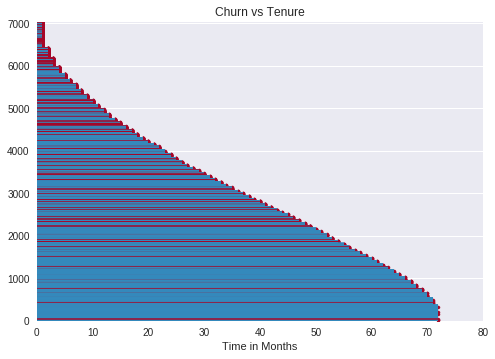

In [109]:
tenure = churn_data.tenure.values
Churn = churn_data.Churn.values

ax = lifelines.plotting.plot_lifetimes(tenure, event_observed=Churn, figsize=(18, 10))
ax.set_xlim(0, 80)
ax.grid(axis='x')
ax.set_xlabel("Time in Months")
ax.set_title("Churn vs Tenure");
plt.plot();

### Kaplan-Meier Fitter

In [110]:
kmf = lifelines.KaplanMeierFitter()

kmf.fit(tenure, event_observed=Churn)

<lifelines.KaplanMeierFitter: fitted with 7032 observations, 5163 censored>

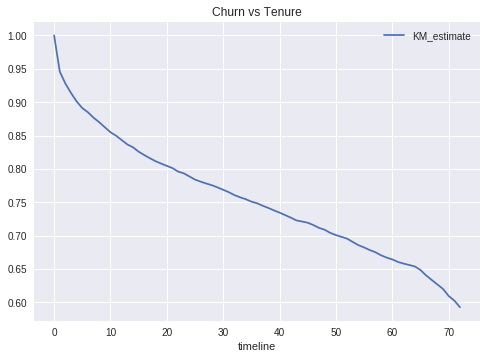

In [111]:
kmf.survival_function_.plot()
plt.title('Churn vs Tenure');

### Cox Proportional Hazards Model

In [112]:
cph = lifelines.CoxPHFitter()
cph.fit(churn_data, duration_col='tenure', event_col='Churn')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7032 observations, 5163 censored>
      duration col = 'tenure'
         event col = 'Churn'
number of subjects = 7032
  number of events = 1869
    log-likelihood = -12679.08
  time fit was run = 2019-02-27 08:31:13 UTC

---
                  coef  exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
SeniorCitizen     0.04       1.04      0.06   0.68   0.50      1.01       -0.07        0.15
Partner          -0.18       0.84      0.05  -3.23 <0.005      9.65       -0.28       -0.07
Dependents       -0.09       0.91      0.07  -1.31   0.19      2.40       -0.23        0.04
PhoneService      0.04       1.04      0.14   0.31   0.76      0.40       -0.23        0.32
MultipleLines    -0.12       0.89      0.06  -2.09   0.04      4.79       -0.22       -0.01
InternetService   1.41       4.10      0.19   7.53 <0.005     44.17        1.04        1.78
OnlineSecurity   -0.41       0.67      0.07  -6.07 <0.005     29.50       -0.54       -0.27
On

### Plot coeffs

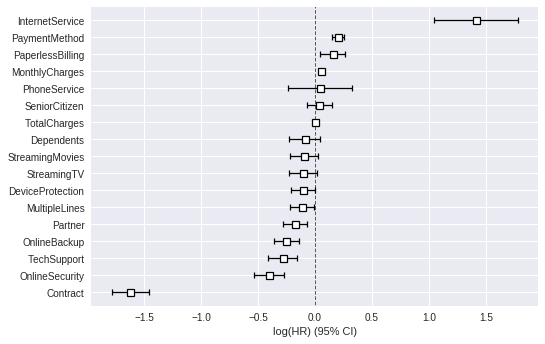

In [113]:
cph.plot()

### Plot Internet Service churn

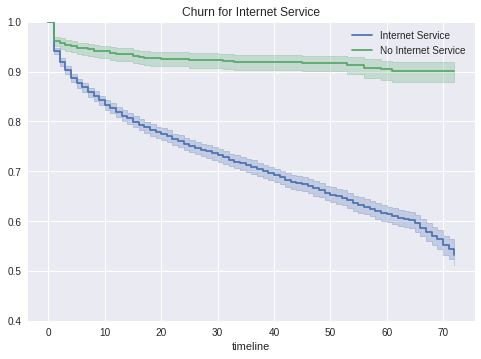

In [114]:
ax = plt.subplot(111)

treatment = (churn_data["InternetService"] == 1)
kmf.fit(tenure[treatment], event_observed=Churn[treatment], label="Internet Service")
kmf.plot(ax=ax)

kmf.fit(tenure[~treatment], event_observed=Churn[~treatment], label="No Internet Service")
kmf.plot(ax=ax)

plt.ylim(.4, 1);
plt.title("Churn for Internet Service");

# Resources and stretch goals

Resources:
- [Wikipedia on Survival analysis](https://en.wikipedia.org/wiki/Survival_analysis)
- [Wikipedia on Survival functions](https://en.wikipedia.org/wiki/Survival_function)
- [Summary of survival analysis by a biostatistician](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Survival/BS704_Survival_print.html)
- [Another medical statistics article on survival analysis](https://www.sciencedirect.com/science/article/pii/S1756231716300639)
- [Survival analysis using R lecture slides](http://www.stat.columbia.edu/~madigan/W2025/notes/survival.pdf)

Stretch goals:
- Make ~5 slides that summarize and deliver your findings, as if you were to present them in a business meeting
- Revisit any of the data from the lecture material, and explore/dig deeper
- Write your own Python functions to calculate a simple hazard or survival function, and try to generate and plot data with them